In [132]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

1st dataset: 80 cereal

https://www.kaggle.com/datasets/crawford/80-cereals

In [133]:
# reading the data and looking at the first five rows of the data
data1=pd.read_csv("cereal.csv")
data1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [134]:
# statistics of the data
data1.describe()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


There is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [135]:
# Dealing with non-numeric column

data1.drop(columns = ["name"], inplace = True)

In [136]:
# Dealing with other non-numeric columns

data1["mfr"].value_counts()
data1["type"].value_counts()

C    74
H     3
Name: type, dtype: int64

In [137]:
data1["mfr"] = data1["mfr"].replace({"K": 1, "G": 2, "P": 3, "Q": 4,
                    "R": 5, "N": 6, "A": 7})
data1["type"] = data1["type"].replace({"C": 0, "H": 1})
data1

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,6,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,4,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,1,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,1,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,5,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,2,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,5,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,2,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [138]:
# Checking for NaN values

data1.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [139]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.009294e-16,-4.469729e-17,-8.398765e-17,2.018587e-17,8.583502e-17,5.767392e-18,9.155735e-17,2.883696e-18,-1.658125e-17,-7.353425e-17,2.883696e-17,-1.095805e-16,-1.881612e-16,1.492313e-16,3.027881e-17
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-1.019495e+00,-2.013468e-01,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-3.669045e+00,-1.793978e+00,-1.370723e+00,-1.272550e+00,-1.460273e+00,-3.542628e+00,-2.469891e+00,-1.764349e+00
25%,-1.019495e+00,-2.013468e-01,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-6.109983e-01,-8.881661e-01,-7.918105e-01,-1.462701e-01,-1.460273e+00,-1.980675e-01,-6.532825e-01,-6.801207e-01
50%,-4.247896e-01,-2.013468e-01,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-1.405296e-01,1.764569e-02,-8.581921e-02,-1.462701e-01,-2.512297e-01,-1.980675e-01,-3.072619e-01,-1.623340e-01
75%,7.646213e-01,-2.013468e-01,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.651734e-01,9.234575e-01,3.377756e-01,-1.462701e-01,9.578133e-01,-1.980675e-01,7.740527e-01,5.848967e-01
max,2.548738e+00,4.966555e+00,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,1.976579e+00,1.829269e+00,3.302939e+00,3.232570e+00,9.578133e-01,3.146493e+00,2.936682e+00,3.657211e+00


In [140]:
#  kmeans
kmeans = KMeans(n_clusters=3, init='random')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [141]:
# inertia on the fitted data
kmeans.inertia_

807.5385197616906

In [142]:
pred = kmeans.predict(data_scaled)
pred

array([0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1], dtype=int32)

In [143]:
kmeans.n_iter_

13

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

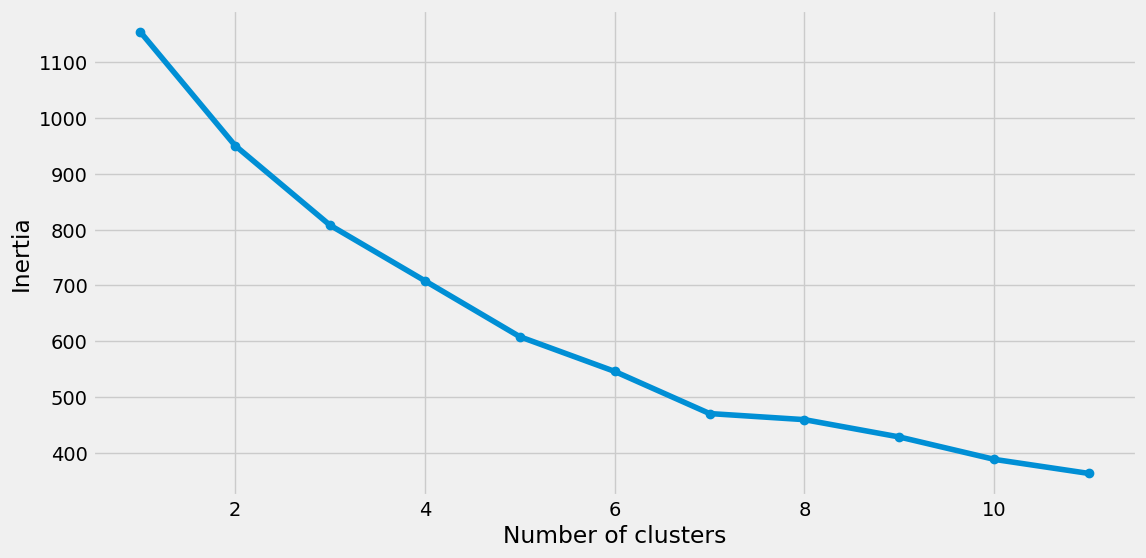

In [144]:
# elbow plot for k-means
SSE = []
for cluster in range(1,12):
    kmeans = KMeans(n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##### the elbow is at 4, so cluster is 4.

## silhouette coefficient

In [145]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print("Silhouette coefficient with 4 clusters: ", silhouette_score(data_scaled, pred))

Silhouette coefficient with 4 clusters:  0.18470433685146193


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [146]:
# Implementing KMeans++

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [147]:
pred = kmeans.predict(data_scaled)
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 3, 2,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 3,
       1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 2, 3, 3, 3,
       0, 2, 3, 2, 1, 2, 2, 0, 2, 2, 0], dtype=int32)

In [148]:
# The lowest SSE value
kmeans.inertia_

711.7096931410008

In [149]:
kmeans.n_iter_

7

In [150]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 3, 2,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 3,
       1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 2, 2, 3, 3, 3,
       0, 2, 3, 2, 1, 2, 2, 0, 2, 2, 0], dtype=int32)

In [151]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.31666133, -0.20134682,  0.20798344, -0.91940708,  0.03247027,
         0.12396629, -0.65926792, -0.49338111,  0.99551073, -0.71864417,
        -0.14627013, -0.47105572, -0.19806746,  0.20980312, -0.98485534],
       [-0.16047607, -0.20134682,  0.33322078,  0.62222499,  0.50557414,
        -0.13395752,  0.79612278, -0.27992773,  0.22732435,  0.95224954,
         0.06230024,  0.82347518,  0.65665349, -0.77022472,  0.18857297],
       [-0.1743873 , -0.20134682, -0.13806711,  0.07918338, -0.43407625,
         0.89492912, -0.33090411,  0.99849982, -0.81665469, -0.40908893,
         0.56506461, -0.3784974 , -0.19806746,  0.7103121 ,  0.17522895],
       [ 1.6236402 ,  1.52128706, -1.21659131,  0.21359962, -0.679711  ,
        -1.79045097, -0.07824921, -0.06211816, -1.39139495, -0.23643069,
        -1.02226568, -0.51990594, -1.06765313,  0.29827432,  1.47177748]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

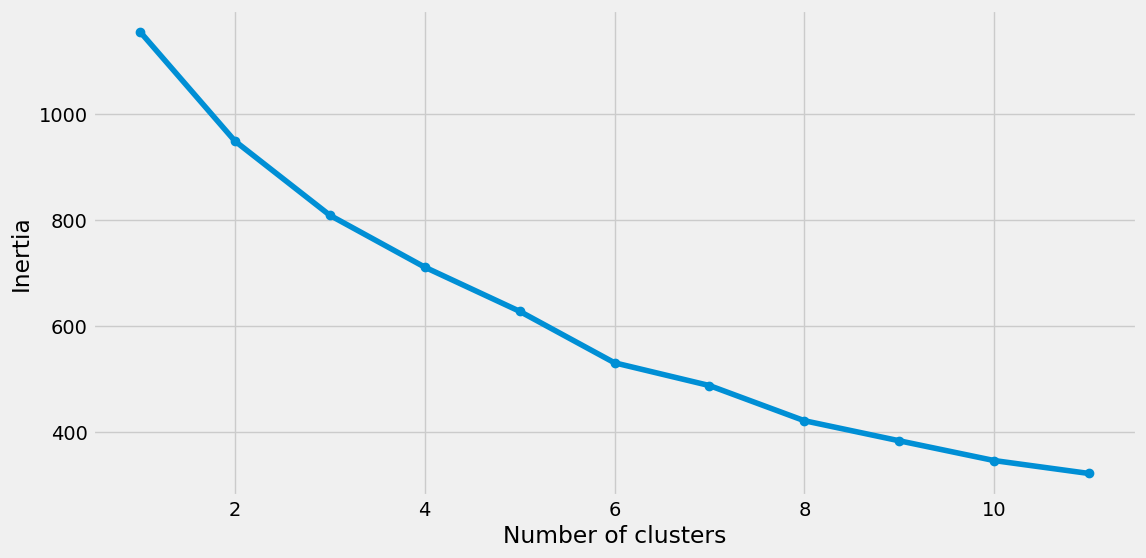

In [152]:
# elbow plot for k-means++
SSE = []
for cluster in range(1,12):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

elbow at 4 so cluster = 4

In [153]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print("Silhouette coefficient with 4 clusters: ", silhouette_score(data_scaled, pred))

Silhouette coefficient with 4 clusters:  0.18067757740726179


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 2nd data set : using groundhog day forecast temperature dataset

https://www.kaggle.com/datasets/groundhogclub/groundhog-day

In [154]:
# reading the data and looking at the first five rows of the data
data2=pd.read_csv("ground_day.csv")
data2.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
data2["Punxsutawney Phil"] = data2["Punxsutawney Phil"].replace({"No Record": 0, "No Shadow": 1,
                                                             "Partial Shadow": 2, "Full Shadow": 3})
data2

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
127,2013,1.0,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,3.0,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,3.0,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6
130,2016,1.0,39.47,28.1,36.9,30.8,47.50,38.8,49.5,43.4


In [156]:
# Dropping the last row

data2.drop(index = 131, axis = 0, inplace = True)
data2

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
126,2012,3.0,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7
127,2013,1.0,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
128,2014,3.0,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
129,2015,3.0,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6


In [157]:
data2.dtypes

Year                                            object
Punxsutawney Phil                              float64
February Average Temperature                   float64
February Average Temperature (Northeast)       float64
February Average Temperature (Midwest)         float64
February Average Temperature (Pennsylvania)    float64
March Average Temperature                      float64
March Average Temperature (Northeast)          float64
March Average Temperature (Midwest)            float64
March Average Temperature (Pennsylvania)       float64
dtype: object

In [158]:
data2["Year"] = data2["Year"].astype('float64') # Typecasting

In [159]:
# Dealing with NaN values
import numpy as np
for col in data2:
    data2[col].replace({np.nan: data2[col].mean()}, inplace=True)



In [160]:
data2.isna().sum()

Year                                           0
Punxsutawney Phil                              0
February Average Temperature                   0
February Average Temperature (Northeast)       0
February Average Temperature (Midwest)         0
February Average Temperature (Pennsylvania)    0
March Average Temperature                      0
March Average Temperature (Northeast)          0
March Average Temperature (Midwest)            0
March Average Temperature (Pennsylvania)       0
dtype: int64

In [161]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [162]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled2 = scaler.fit_transform(data2)

# statistics of scaled data
pd.DataFrame(data_scaled2).describe()


,0,1,2,3,4,5,6,7,8,9
count,131.000000,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,0.000000,-1.220398e-16,-2.169596e-16,1.084798e-16,9.288583e-16,4.881591e-16,-1.071238e-15,4.542592e-16,-1.083103e-15,1.423797e-15
std,1.003839,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00,1.003839e+00
min,-1.718879,-2.421554e+00,-2.717117e+00,-2.986419e+00,-2.651467e+00,-2.600268e+00,-2.208891e+00,-2.185046e+00,-3.244817e+00,-2.820237e+00
25%,-0.859440,5.157014e-01,-6.062315e-01,-6.300194e-01,-5.870716e-01,-6.253142e-01,-7.425357e-01,-6.869792e-01,-7.193270e-01,-6.694974e-01
50%,0.000000,5.157014e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.065860e-02,0.000000e+00,0.000000e+00,-1.638784e-15,0.000000e+00
75%,0.859440,5.157014e-01,6.663220e-01,7.425229e-01,7.499717e-01,7.295959e-01,6.267685e-01,6.238289e-01,5.722478e-01,6.036418e-01
max,1.718879,5.157014e-01,2.411131e+00,2.163651e+00,1.862392e+00,2.130435e+00,3.074223e+00,2.951182e+00,3.166929e+00,2.915069e+00


In [163]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [164]:
# inertia on the fitted data
kmeans.inertia_

803.0322590048802

In [165]:
pred = kmeans.predict(data_scaled2)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2],
      dtype=int32)

In [166]:
kmeans.n_iter_

7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

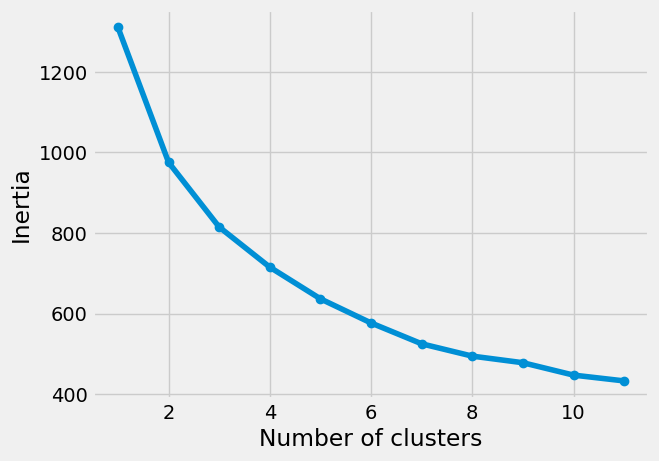

In [167]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,12):
    kmeans = KMeans(n_clusters = cluster, init='random')
    kmeans.fit(data_scaled2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

elbow is at 4 so number of clusters is 4.

In [168]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

print("Silhouette coefficient with 4 clusters: ", silhouette_score(data_scaled2, pred))

Silhouette coefficient with 4 clusters:  0.1831594187422782


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [169]:
#implement K-means++
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 3, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1, 2, 3, 2, 3, 2, 1,
       3, 2, 2, 2, 1, 3, 1, 2, 3, 2, 2, 2, 1, 0, 2, 3, 3, 2, 1, 3, 2, 2,
       2, 3, 3, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 3,
       3, 2, 3, 3, 1, 1, 1, 3, 1, 3, 2, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 1, 3],
      dtype=int32)

In [170]:
# The lowest SSE value
kmeans.inertia_

717.9337308092503

In [171]:
kmeans.n_iter_

7

In [172]:
kmeans.labels_

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 0, 3, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1, 2, 3, 2, 3, 2, 1,
       3, 2, 2, 2, 1, 3, 1, 2, 3, 2, 2, 2, 1, 0, 2, 3, 3, 2, 1, 3, 2, 2,
       2, 3, 3, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 3,
       3, 2, 3, 3, 1, 1, 1, 3, 1, 3, 2, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 1, 3],
      dtype=int32)

In [173]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.24477071, -2.2816851 , -0.3318676 , -0.20222178, -0.41501576,
        -0.30773611, -0.377948  , -0.22119847, -0.21551452, -0.18818758],
       [ 0.00528886,  0.37583208, -0.82094231, -1.07908886, -0.95044183,
        -1.04523789,  0.27340131,  0.00778729,  0.24572976,  0.10250882],
       [-0.07030312,  0.32466038,  0.01248093,  0.192895  ,  0.14674225,
         0.19886719, -0.74139061, -0.83159178, -0.88253057, -0.89249181],
       [ 0.4908319 ,  0.13361935,  0.80164412,  0.79732976,  0.80632323,
         0.79848968,  0.63705465,  0.90047528,  0.74635158,  0.86924345]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

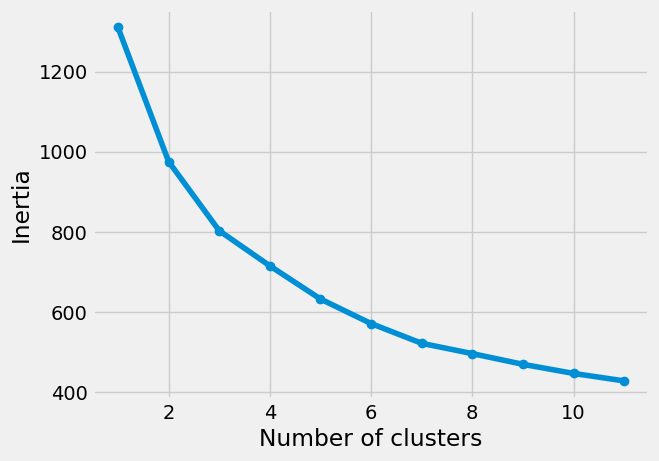

In [174]:
# elbow graph using k-means
SSE = []
for cluster in range(1,12):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,12), 'SSE':SSE})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Elbow is at 4 so number of clusters is 4.

In [175]:
# determining the silhouette coefficient

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

print("Silhouette coefficient with 4 clusters: ", silhouette_score(data_scaled, pred))

Silhouette coefficient with 4 clusters:  0.2073970742174194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##  How will you incorporate the streaming data into your already existing clusters?

Answer: To incorporate streaming data, we can use 'minibatch K Means'.

* Initializing clusters with the existing data.
* Receive and process small batches of streaming data.
* Update the existing clusters using the MiniBatchKMeans with the new data batch.
* Repeat this process as new streaming data arrives.


Below is example for cereal and grounday hog datasets.

In [180]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
inertia = kmeans.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

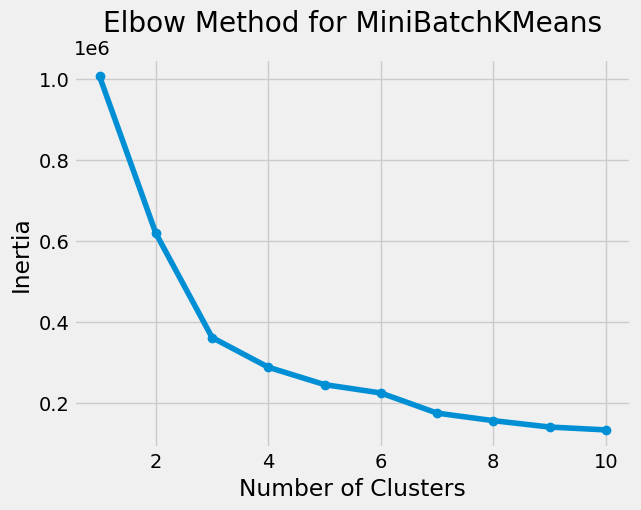

In [181]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data1)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for MiniBatchKMeans')
plt.show()


In [177]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4, init='k-means++')
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)
inertia = kmeans.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

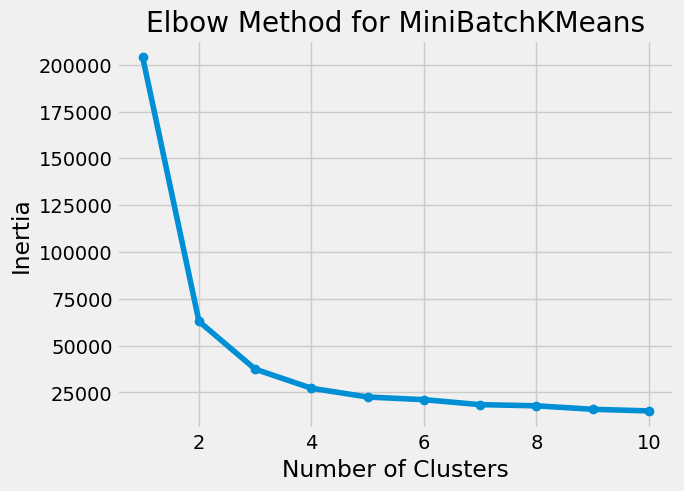

In [179]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data2)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for MiniBatchKMeans')
plt.show()
